In [5]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


In [6]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/data_science_assignment/Merged_data_labeled.csv", dtype={'id': str}) # Reading data from a CSV file
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-72.0,68.0,-38.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.000000000,2.0
1,-18.0,74.0,-21.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.031249920,2.0
2,-17.0,69.0,-36.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.062500096,2.0
3,-27.0,57.0,-20.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.093750016,2.0
4,7.0,61.0,1.0,22.903978,90.85,35.73,94,2020-05-10 23:55:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509046,2.0,-44.0,45.0,1.542354,76.90,31.65,7A,2020-07-07 13:43:59.875000064,2.0
11509047,2.0,-44.0,45.0,1.542354,76.90,31.65,7A,2020-07-07 13:43:59.906249984,2.0
11509048,2.0,-44.0,45.0,1.542354,76.90,31.65,7A,2020-07-07 13:43:59.937499904,2.0
11509049,2.0,-44.0,45.0,1.542354,76.90,31.65,7A,2020-07-07 13:43:59.968750080,2.0


In [ ]:
df['label'].value_counts()

2.0    8540583
0.0    2162246
1.0     806222
Name: label, dtype: int64

In [ ]:
# Converting the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
# Selecting a subset of data for a specific ID
new_df = df[df['id'] == '6B' ]
new_df['label'].value_counts()

2.0    718027
0.0    107522
Name: label, dtype: int64

In [ ]:
new_df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
3771288,-48.0,4.0,41.0,0.371295,76.90,30.07,6B,2020-06-23 15:46:00.000000000,0.0
3771289,-50.0,5.0,41.0,0.371295,76.90,30.07,6B,2020-06-23 15:46:00.031249920,0.0
3771290,-47.0,5.0,40.0,0.371295,76.90,30.07,6B,2020-06-23 15:46:00.062500096,0.0
3771291,-43.0,6.0,41.0,0.371295,76.90,30.07,6B,2020-06-23 15:46:00.093750016,0.0
3771292,-47.0,6.0,42.0,0.371295,76.90,30.07,6B,2020-06-23 15:46:00.124999936,0.0
...,...,...,...,...,...,...,...,...,...
4596832,-61.0,-9.0,-32.0,2.563308,83.23,31.49,6B,2020-06-30 15:38:59.875000064,2.0
4596833,-58.0,-6.0,-29.0,2.563308,83.23,31.49,6B,2020-06-30 15:38:59.906249984,2.0
4596834,-69.0,-5.0,-40.0,2.563308,83.23,31.49,6B,2020-06-30 15:38:59.937499904,2.0
4596835,-75.0,-3.0,-43.0,2.563308,83.23,31.49,6B,2020-06-30 15:38:59.968750080,2.0


In [ ]:
#Converting the 'datetime' column to 'date' format and adding it as a separate column
new_df['date'] = new_df['datetime'].dt.date


<ipython-input-8-c2b1cbaa6fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['datetime'].dt.date


In [ ]:
new_df['date'] = new_df['date'].astype('str')
new_df['date'].value_counts()

<ipython-input-9-65c7ab83df5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['date'].astype('str')


2020-06-29    401284
2020-06-26    124739
2020-06-25    113282
2020-06-23     96002
2020-06-30     67201
2020-06-24     23041
Name: date, dtype: int64

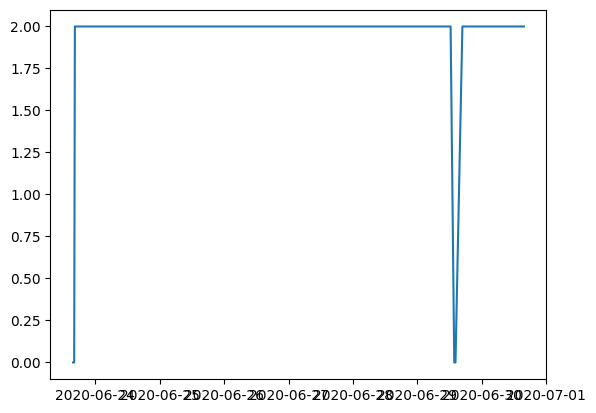

In [ ]:
import matplotlib.pyplot as plt
# Plotting the 'label' column against the 'datetime' column
target = new_df['label']
x = new_df['datetime']

plt.plot(x, target)

In [ ]:
Dropping the 'id' column and setting 'datetime' column as the index
new_df.drop(columns=['id'], inplace = True)
new_df.shape

<ipython-input-11-9c940d989064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['id'], inplace = True)


(825549, 9)

In [ ]:
# Splitting the data into train and validation sets
df1 = new_df[new_df['date'] == '2020-06-23']
df2 = new_df[new_df['date'] == '2020-06-24']
df3 = new_df[new_df['date'] == '2020-06-25']
df4 = new_df[new_df['date'] == '2020-06-26']
df5 = new_df[new_df['date'] == '2020-06-29']
df6 = new_df[new_df['date'] == '2020-06-30']



In [ ]:
df1.shape[0] + df2.shape[0] +df3.shape[0]+ df4.shape[0] + df5.shape[0] + df6.shape[0] == new_df.shape[0]

True

In [ ]:
df1['label'].value_counts()


2.0    23041
Name: label, dtype: int64

In [ ]:
df2['label'].value_counts()


2.0    113282
Name: label, dtype: int64

In [ ]:
df3['label'].value_counts()


2.0    124739
Name: label, dtype: int64

In [ ]:
df4['label'].value_counts()


Series([], Name: label, dtype: int64)

In [ ]:
df5['label'].value_counts()

2.0    343683
0.0     57601
Name: label, dtype: int64

In [ ]:
df6['label'].value_counts()

2.0    67201
Name: label, dtype: int64

In [ ]:
x1 =  df3.append(df4)
x2 = x1.append(df2)
train = df1.append(x2)
train.sort_values(by = "datetime")

<ipython-input-84-9261ed8f8876>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x1 =  df3.append(df4)
<ipython-input-84-9261ed8f8876>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x2 = x1.append(df2)
<ipython-input-84-9261ed8f8876>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = df1.append(x2)


,X,Y,Z,EDA,HR,TEMP,datetime,label,date
3771288,-48.0,4.0,41.0,0.371295,76.90,30.07,2020-06-23 15:46:00.000000000,0.0,2020-06-23
3771289,-50.0,5.0,41.0,0.371295,76.90,30.07,2020-06-23 15:46:00.031249920,0.0,2020-06-23
3771290,-47.0,5.0,40.0,0.371295,76.90,30.07,2020-06-23 15:46:00.062500096,0.0,2020-06-23
3771291,-43.0,6.0,41.0,0.371295,76.90,30.07,2020-06-23 15:46:00.093750016,0.0,2020-06-23
3771292,-47.0,6.0,42.0,0.371295,76.90,30.07,2020-06-23 15:46:00.124999936,0.0,2020-06-23
...,...,...,...,...,...,...,...,...,...
4080410,-27.0,-62.0,18.0,5.663661,86.65,31.31,2020-06-26 14:00:59.875000064,2.0,2020-06-26
4080411,-34.0,-60.0,15.0,5.663661,86.65,31.31,2020-06-26 14:00:59.906249984,2.0,2020-06-26
4080412,-61.0,-62.0,13.0,5.663661,86.65,31.31,2020-06-26 14:00:59.937499904,2.0,2020-06-26
4080413,-69.0,-57.0,6.0,5.663661,86.65,31.31,2020-06-26 14:00:59.968750080,2.0,2020-06-26


In [ ]:
train.shape
train.set_index('datetime')

,X,Y,Z,EDA,HR,TEMP,label,date
datetime,,,,,,,,
2020-06-23 15:46:00.000000000,-48.0,4.0,41.0,0.371295,76.90,30.07,0.0,2020-06-23
2020-06-23 15:46:00.031249920,-50.0,5.0,41.0,0.371295,76.90,30.07,0.0,2020-06-23
2020-06-23 15:46:00.062500096,-47.0,5.0,40.0,0.371295,76.90,30.07,0.0,2020-06-23
2020-06-23 15:46:00.093750016,-43.0,6.0,41.0,0.371295,76.90,30.07,0.0,2020-06-23
2020-06-23 15:46:00.124999936,-47.0,6.0,42.0,0.371295,76.90,30.07,0.0,2020-06-23
...,...,...,...,...,...,...,...,...
2020-06-24 12:03:59.875000064,-48.0,7.0,2.0,3.276460,85.13,28.99,2.0,2020-06-24
2020-06-24 12:03:59.906249984,-37.0,0.0,-3.0,3.276460,85.13,28.99,2.0,2020-06-24
2020-06-24 12:03:59.937499904,-52.0,2.0,4.0,3.276460,85.13,28.99,2.0,2020-06-24


In [ ]:
train= train.drop('date', axis =1)
train = train.set_index('datetime')

In [ ]:
train

,X,Y,Z,EDA,HR,TEMP,label
datetime,,,,,,,
2020-06-23 15:46:00.000000000,-48.0,4.0,41.0,0.371295,76.90,30.07,0.0
2020-06-23 15:46:00.031249920,-50.0,5.0,41.0,0.371295,76.90,30.07,0.0
2020-06-23 15:46:00.062500096,-47.0,5.0,40.0,0.371295,76.90,30.07,0.0
2020-06-23 15:46:00.093750016,-43.0,6.0,41.0,0.371295,76.90,30.07,0.0
2020-06-23 15:46:00.124999936,-47.0,6.0,42.0,0.371295,76.90,30.07,0.0
...,...,...,...,...,...,...,...
2020-06-24 12:03:59.875000064,-48.0,7.0,2.0,3.276460,85.13,28.99,2.0
2020-06-24 12:03:59.906249984,-37.0,0.0,-3.0,3.276460,85.13,28.99,2.0
2020-06-24 12:03:59.937499904,-52.0,2.0,4.0,3.276460,85.13,28.99,2.0


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
col_names = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'label']  # Scaling the data using StandardScaler
features = train[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP'])
    ], remainder='passthrough')

training = ct.fit_transform(features)


In [ ]:
training

array([[-0.24573706,  0.61068445,  0.90613846, ..., -0.67673281,
        -0.23765304,  0.        ],
       [-0.34379456,  0.64541033,  0.90613846, ..., -0.67673281,
        -0.23765304,  0.        ],
       [-0.19670832,  0.64541033,  0.87124367, ..., -0.67673281,
        -0.23765304,  0.        ],
       ...,
       [-0.44185206,  0.54123268, -0.38496895, ..., -0.12469789,
        -1.15790769,  2.        ],
       [-0.58893831,  0.54123268, -0.31517936, ..., -0.12469789,
        -1.15790769,  2.        ],
       [-0.9811683 ,  0.74958797, -0.14070539, ..., -0.13341776,
        -1.15790769,  2.        ]])

In [ ]:
val= df5.drop('date', axis =1)
val = val.set_index('datetime')

In [ ]:
val1 = ct.fit(val)

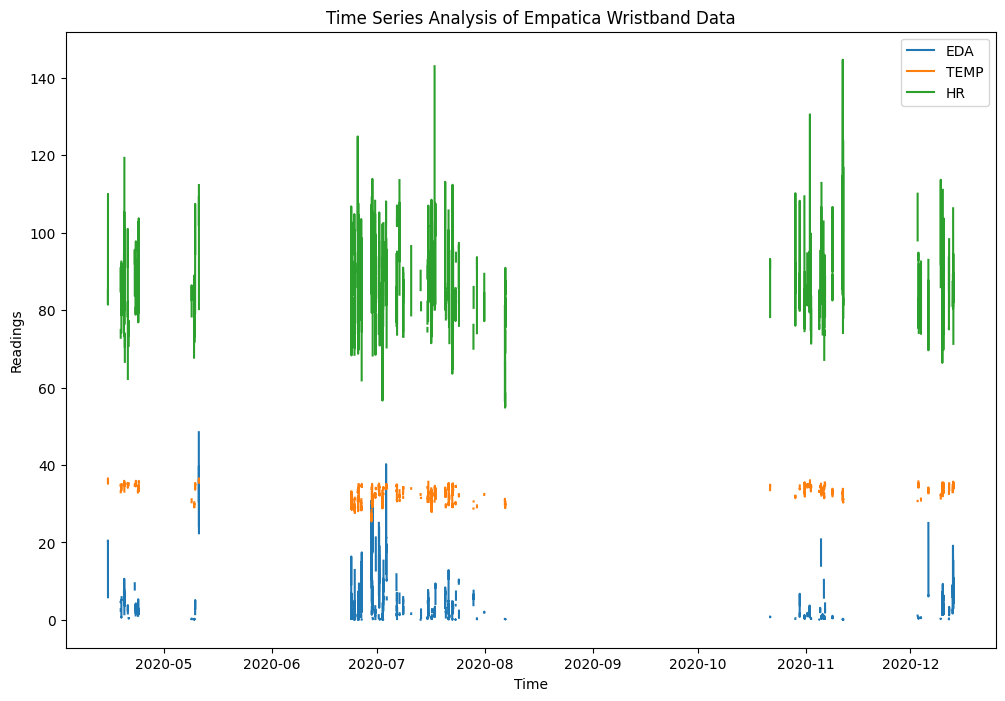

In [8]:
df = pd.read_csv('/content/drive/MyDrive/data_science_assignment/Merged_data_labeled.csv', index_col='datetime', parse_dates=['datetime'], dtype={'id': str})

#Resample the data
df_resampled = df.resample('5min').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_resampled.index, df_resampled['EDA'], label='EDA')
ax.plot(df_resampled.index, df_resampled['TEMP'], label='TEMP')
ax.plot(df_resampled.index, df_resampled['HR'], label='HR')

ax.set_xlabel('Time')
ax.set_ylabel('Readings')
ax.set_title('Time Series Analysis of Empatica Wristband Data')
ax.legend()

plt.show()

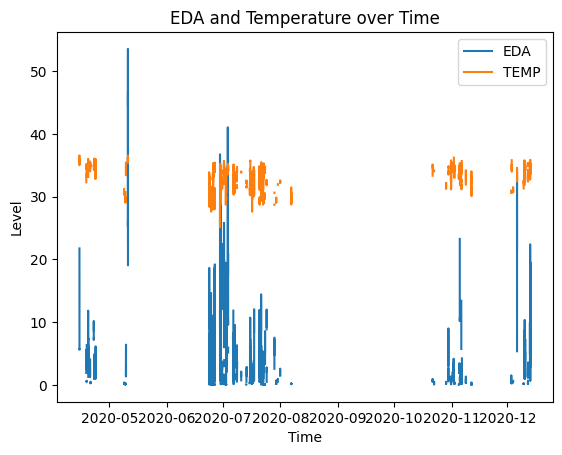

In [9]:
# Resample the data to 1 minute intervals
df_resampled = df.resample('1T').mean(numeric_only=True)

# Plot the EDA and skin temperature data over time
plt.plot(df_resampled.index, df_resampled['EDA'], label='EDA')
plt.plot(df_resampled.index, df_resampled['TEMP'], label='TEMP')

# Set the chart title and axis labels
plt.title('EDA and Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Level')

# Show the legend
plt.legend()

# Display the chart
plt.show()

In [ ]:
x_train = training[:,:-1]
y_train = training[:,-1]

In [ ]:
# Training random forest classifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [10, 20, 30, None]}
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(x_train, y_train)
print('Best parameters:', rfc_cv.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 10}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

In [ ]:
val1

ColumnTransformer(remainder='passthrough',
                  transformers=[('somename', StandardScaler(),
                                 ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP'])])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy:', accuracy)

Validation accuracy: 0.8804017204392883


In [ ]:
test = ct.transform(df6)

In [ ]:
X_test = test[:,:-1]
y_test = test[:,-1]
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Validation accuracy:', accuracy) # this is test accuracy by mistake it has written validation accuracy

Validation accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1score   = f1_score        (y_test, y_pred, average ='weighted')
recall    = recall_score    (y_test, y_pred, average = 'weighted')
precision = precision_score (y_test, y_pred, average = 'weighted')
accuracy  = accuracy_score  (y_test, y_pred)

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)

acc = 1.0
pre = 1.0
recall = 1.0
f1 = 1.0


In [ ]:
# Training for KNN classifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
logeg =KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(logeg, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 5}


In [ ]:
from pandas.core.frame import algorithms
from sklearn.ensemble import RandomForestClassifier
knn =KNeighborsClassifier(n_neighbors= 10, algorithm = 'auto')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Validation KNN Classifier
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy:', accuracy)

Validation accuracy: 0.8475895706372669


In [ ]:
scaledf5 = ct.transform(df5)

In [ ]:
X_test = scaledf5[:,:-1]
y_test = scaledf5[:,-1]
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.7826377328774633


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1score   = f1_score        (y_test, y_pred, average ='weighted')
recall    = recall_score    (y_test, y_pred, average = 'weighted')
precision = precision_score (y_test, y_pred, average = 'weighted')
accuracy  = accuracy_score  (y_test, y_pred)

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)

acc = 0.7826377328774633
pre = 0.8034727915346773
recall = 0.7826377328774633
f1 = 0.7921744390569716
